## 데이터 셋 준비하기
 - CSV 참고 링크 주소 https://bit.ly/perch_csv_data
 - 판다스를 이용한 데이터 셋 준비

In [13]:
import pandas as pd # pd는 관례적으로 사용하는 판다스의 별칭입니다.

df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

타깃 데이터는 이전과 동일한 방식으로 준비 하겠습니다.
 - https://bit.ly/perch_data

In [14]:
import numpy as np

# 농어 무게
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나눕니다.

In [15]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(42, 3) (42,)
(14, 3) (14,)


위에 데이터를 사용해 새로운 특성을 만들겠습니다.

2개의 특성 2와 3으로 이루어진 샘플 하나를 적용하겠습니다.

이 클래스의 객체를 만든 다음 fit(), transform() 메서드를 차례대로 호출합니다.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


fit() 메서드는 새롭게 만들 특성 조합을 찾고 transform() 메서드는 실제로 데이터를 반환합니다. fit() 메서드 호출을 눈여겨보시면 되겠습니다. 변환기는 입력 데이터를 변환하는 데 타깃 데이터가 필요하지 않습니다. 따라서 모델 클래스와는 다르게 fit() 메서드에 입력 데이터만 전달했습니다. 즉 여기에서는 2개의 특성을 가진 샘플[2, 3]이 6개의 특성을 가진 샘플[1, 2, 3, 4, 6, 9]로 바뀌었습니다.

PolynomialFeatures 클래스는 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 곱한 항을 추가 합니다.

2와 3을 각기 제곱한 4, 9가 추가되었고,

2와 3을 곱한 6이 추가 되었습니다.

Q. 1은 왜 추가되었을까요?
---
**무게 = a*길이 + b*높이 + c*두께 + d * 1**
---
사실 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있습니다. 이렇게 놓고 보면 특성은 (길이, 높이, 두께, 1)이 됩니다. 하지만 사이럿의 선형 모델은 자동으로 절편을 추가하므로 굳이 이렇게 특성을 만들 필요가 없습니다. include_bias=False로 지정하여 다시 특성을 변환하겠습니다.




In [17]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


절편을 위한 항이 제거되고 특성의 제곱과 특성끼리 곱한 항만 추가되었습니다.

이제 이 방식으로 train_input에 적용하겠습니다. train_input을 변환한 데이터를 train_poly에 저장하고 이 배열의 크기를 확인해 보겠습니다.

In [18]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)

(42, 9)


PolynomialFeatures 클래스는 9개의 특성이 어떻게 만들어졌는지 아주 좋은 방법을 제공합니다. get_feature_names_out() 메서드를 호출하면 9개의 특성이 각각 어떤 입력의 조합으로 만들어졌는지 알려 줍니다.

In [32]:
poly.get_feature_names_out()

AttributeError: 'PolynomialFeatures' object has no attribute 'get_feature_names_out'

'x0'은 첫 번째 특성을 의미하고, 'x0^2' 첫 번째 특성의 제곱, 'x0 x1'은 첫 번째 특성과 두 번째 특성의 곱을 나타내는 식입니다.

이제 테스트 세트를 변환하겠습니다.

In [20]:
test_poly = poly.transform(test_input)

print(test_poly.shape)

(14, 9)


이어서 변환된 특성을 사용해서 다중 회귀 모델을 훈련하겠습니다.

다중 회귀 모델을 훈련하는 것은 선형 회귀 모델을 훈련하는 것과 같습니다. 다만 여러 개의 특성을 사용하여 선형 회귀를 수행하는 것 뿐입니다. 먼저 사이킷런의 LinearRegression 클래스를 임포트하고 앞에서 만든 train_poly를 사용해 모델을 훈련시켜 보겠습니다.

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


아주 높은 점수가 나왔습니다. 농어의 길이뿐만 아니라 높이와 두께를 모두 사용했고 각 특성을 제곱하거나 서로 곱해서 다항 특성을 더 추가했습니다. 특성이 늘어나면 선형 회귀의 능력은 매우 강하다는 것을 알 수 있습니다.

테스트 세트에 대한 점수도 확인하겠습니다.

In [22]:
print(lr.score(test_poly, test_target))

0.9714559911594155


perch_02.ipynb 의 정보와 비교해 테스트 세트에 대한 점수는 높아지지 않았지만 농어의 길이만 사용했을 때 있던 과소적합 문제는 더 이상 나타나지 않았습니다.

특성을 더 많이 추가하면 어떨까요? 3제곱, 4제곱 항을 넣는 겁니다. PolynomialFeatures 클래스의 degree 매겨변수를 사용하여 필요한 고차항의 최대 차수를 지정할 수 있습니다. 5제곱까지 특성을 만들어 출력해 보겠습니다.

In [23]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

(42, 55)


특성이 55개가 출력 되고 있습니다. train_poly 배열의 열의 개수가 특성의 개수입니다. 이 데이터를 사용해 선형 회귀 모델을 다시 훈련하겠습니다.

In [24]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


거의 완벽한 점수입니다. 테스트 세트에 대한 점수는 어떨까요?

In [25]:
print(lr.score(test_poly, test_target))

-144.40744532797535


아주 큰 음수가 나왔습니다.

특성의 개수를 크게 늘리면 선형 모델은 아주 강력해집니다. 훈련 세트에 대해 거의 완벽하게 학습할 수 있죠. 하지만 이런 모델은 훈련 세트에 너무 과대적합되므로 테스트 세트에서는 형편없는 점수를 만듭니다.

이 문제를 해결하려면 다시 특성을 줄여야겠습니다. 하지만 이런 상황은 과대적합을 줄이는 또 다른 방법을 적용할 좋은 기회입니다.

이어서 바로 확인해 보겠습니다.

In [26]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

먼저 StandardScaler 클래스의 객체 ss를 초기화 후 PolynomialFeatures 클래스로 만든 train_poly를 사용해 이 객체를 훈련합니다. 여기에서도 꼭 훈련 세트로 학습한 변환기를 사용해 테스트 세트까지 변환해야 합니다.

이제 표준점수로 변환한 train_scaled와 test_scaled가 준비되었습니다.

In [27]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


선형 회귀에서는 거의 완벽에 가까웠던 점수가 조금 낮아졌습니다. 이번에는 테스트 세트에 대한 점수를 확인하겠습니다.

In [28]:
print(ridge.score(test_scaled, test_target))

0.979069397761539


테스트 세트 점수가 정상으로 돌아왔습니다. 확실히 많은 특성을 사용했음에도 불구하고 훈련 세트에 너무 과대적합되지 않아 테스트 세트에서도 좋은 성능을 내고 있습니다.

릿지와 라쏘 모델을 사용할 때 규제의 양을 임의로 조절할 수 있습니다. 모델 객체를 만들 때 alpha 매개변수로 규제의 강조를 조절합니다. alpha 값이 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도합니다. alpha 값이 작으면 계수를 줄이는 역할이 줄어들고 선형회귀 모델과 유사해지므로 과대적합될 가능성이 큽니다.

---

Tip. 사람이 직접 지정해야 하는 매개변수
alpha 값은 릿지 모델이 학습하는 값이 아니라 사전에 우리가 지정해야 하는 값입니다. 이렇게 머신러닝 모델이 학습할 수 없고, 사람이 알려줘야 하는 파라미터를 하이퍼파라미터(hyperparameter)라고 부릅니다. 사이킷런과 같은 머신러닝 라이브러리에서 하이퍼파라미터는 클래스와 메서드의 매개변수로 표현됩니다. 함수와 클래스의 파라미터는 매개변수라고 하고 모델과 관련된 파라미터(모델 파라미터, 하이퍼파라미터)는 그대로 파라미터라고 표현합니다.

---

적절한 alpha 값을 찾는 한 가지 방법은 alpha 값에 대한 R<sup>2</sup>값의 그래프를 그려 보는 것입니다. 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 alpha값이 됩니다.

먼저 맷플롯립을 임포트하고 alpha값을 바꿀 때마다 score() 메서드의 결과를 저장할 리스트를 만듭니다.

In [29]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

다음 코드는 alpha 값을 0.001에서 100까지 10배씩 늘려가며 릿지 회귀 모델을 훈련한 다음 훈련 세트와 테스트 세트의 점수를 파이썬 리스트에 저장합니다.

In [30]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    # 릿지 모델을 만듭니다.
    ridge = Ridge(alpha = alpha)
    # 릿지 모델을 훈련합니다.
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다.
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

이제 그래프를 그려보겠습니다. alpha 값을 0.001 부터 10배씩 늘렸기 때문에 이대로 그래프를 그리면 그래프 왼쪽이 너무 촘촘해집니다. alpha_list에 있는 6개의 값을 동일한 간격으로 나타내기 위해 로그 함수로 바꾸어 지수로 표현하겠습니다. 즉 0.001 = -3, 0.01 = -2가 되는 식입니다.

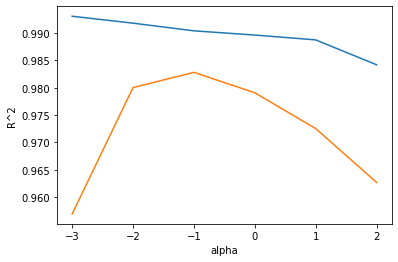

In [31]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

적절한 alpha 값은 두 그래프가 가장 가깝고 테스트 세트 점수가 가장 높은 -1, 즉 10<sup>-1</sup> = 0.1 입니다.

alpha 값을 0.1로 하여 최종 모델을 훈련하겠습니다.

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

이 모델은 훈련 세트와 테스트 세트의 점수가 비슷하게 모두 높고 과대적합과 과소적합 사이에서 균형을 맞추고 있습니다. 그럼 이번에는 라쏘 모델을 훈련해 보겠습니다.

라쏘 모델을 훈련하는 것은 릿지와 매우 비슷합니다. Ridge 클래스를 Lasso클래스로 바꾸는 것이 전부 입니다.

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

NameError: name 'train_scaled' is not defined

라쏘도 과대적합을 잘 억제한 결과를 보여 줍니다. 테스트 세트의 점수도 확인해 보겠습니다.

In [ ]:
print(lasso.score(test_scaled, test_target))

테스트 세트의 점수도 릿지만큼 아주 좋습니다. 라쏘 모델도 alpha 매개변수로 규제의 강도를 조절할 수 있습니다. 여기에서도 앞에서와 같이 alpha값을 바꾸어 가며 훈련 세트와 테스트 세트에 대한 점수를 계산하겠습니다.

In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다.
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다.
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다.
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

그 다음 train_socre와 test_score 리스트를 사용해 그래프를 그립니다. 이 그래프도 x축은 로그 스케일로 바꿔 그리겠습니다.

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

라쏘 모델에서 최적의 alpha 값은 1, 즉 10<sup>1</sup>=10 입니다. 이 값으로 다시 모델을 훈련하겠습니다.

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

모델이 잘 훈련된 것 갔습니다. 특성을 많이 사용했지만, 릿지와 마찬가지로 라쏘 모델이 과대적합을 잘 억제하고 테스트 세트의 성능을 크게 높였습니다. 앞에서 라쏘 모델은 게수 값을 0으로 만들 수 있다고 설명했습니다. 라쏘 모델의 계수는 coef_ 속성에 저장되어 있습니다. 이중에 0인 것을 헤아려 보겠습니다.

In [ ]:
print(np.sum(lasso.coef_ == 0))

55개의 특성을 모델에 주입했지만 라쏘 모델이 사용한 특성은 15개 밖에 되지 않습니다.(55 - 40 = 15)

이런 특징 때문에 라쏘 모델을 유용한 특성을 골라내는 용도로도 사용할 수 있습니다.